In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\matth\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
#importing the data, in this case need to define the seperator otherwise does not import properly.
data =pd.read_csv("marketing_campaign.csv",sep="\t")
data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
57,7437,1988,Graduation,Single,27938.0,1,0,28-04-2014,31,13,...,3,0,0,0,0,0,0,3,11,0
1606,8969,1977,Graduation,Married,71855.0,0,1,16-01-2013,59,548,...,3,0,0,0,0,0,0,3,11,0
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,...,2,0,0,0,0,0,1,3,11,0
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
1383,4345,1964,2n Cycle,Single,NaN,1,1,12-01-2014,49,5,...,7,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
246,2176,1972,Graduation,Married,80134.0,1,0,20-05-2013,40,1218,...,6,0,1,1,1,0,0,3,11,1
16,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,8,0,0,0,0,0,0,3,11,0
38,8595,1973,Graduation,Widow,42429.0,0,1,11-02-2014,99,55,...,5,0,0,0,0,0,0,3,11,0
68,4477,1958,Graduation,Together,69096.0,0,1,27-09-2013,4,247,...,4,0,0,0,0,0,0,3,11,0


In [3]:
#taking a copy of the original data-set
df=data.copy()

# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

Can see from the above that there are 2240 rows of data. Further we can conclude the following:
1. Income has missing values. 24 to be precise.
2. From initially inspector of the dataframe, 'Dt_Customer' appears to be a date. However, it is being read as an object.

Point 1 can be further clarified by checking for an Na's as shown below.

In [5]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
#number of unique items per columns
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

# Data Cleaning

Can see that the columns "Z_CostContact" and "Z_Revenue" have a single unique value throughout and thus adding nothing to the problem. The "AcceptedCmp..", "Complain", and "Response" columns have only 2 values which again are going to be of little value. Thus I'll drop them from the data set. The dataset also has an ID column which should be removed to avoid any confusion.

In [7]:
df.drop(columns=["Z_CostContact", "Z_Revenue", "AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Complain","Response","ID"],axis=1,inplace=True)

Important to check for correlation between columns. High correlation would mean dropping columns.

In [8]:
df_corr_matrix=df.corr().round(2)
df_corr_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.00,-0.16,0.23,-0.35,-0.02,-0.16,-0.02,-0.03,-0.04,-0.02,-0.06,-0.06,-0.15,-0.12,-0.13,0.12
Income,-0.16,1.00,-0.43,0.02,-0.00,0.58,0.43,0.58,0.44,0.44,0.33,-0.08,0.39,0.59,0.53,-0.55
Kidhome,0.23,-0.43,1.00,-0.04,0.01,-0.50,-0.37,-0.44,-0.39,-0.37,-0.35,0.22,-0.36,-0.50,-0.50,0.45
Teenhome,-0.35,0.02,-0.04,1.00,0.02,0.00,-0.18,-0.26,-0.20,-0.16,-0.02,0.39,0.16,-0.11,0.05,0.13
Recency,-0.02,-0.00,0.01,0.02,1.00,0.02,-0.00,0.02,0.00,0.02,0.02,-0.00,-0.01,0.03,0.00,-0.02
MntWines,-0.16,0.58,-0.50,0.00,0.02,1.00,0.39,0.56,0.40,0.39,0.39,0.01,0.54,0.64,0.64,-0.32
MntFruits,-0.02,0.43,-0.37,-0.18,-0.00,0.39,1.00,0.54,0.59,0.57,0.39,-0.13,0.30,0.49,0.46,-0.42
MntMeatProducts,-0.03,0.58,-0.44,-0.26,0.02,0.56,0.54,1.00,0.57,0.52,0.35,-0.12,0.29,0.72,0.48,-0.54
MntFishProducts,-0.04,0.44,-0.39,-0.20,0.00,0.40,0.59,0.57,1.00,0.58,0.42,-0.14,0.29,0.53,0.46,-0.45
MntSweetProducts,-0.02,0.44,-0.37,-0.16,0.02,0.39,0.57,0.52,0.58,1.00,0.37,-0.12,0.35,0.49,0.45,-0.42


Difficult to identify using pure numerical table, therefore use heatmap to visually check

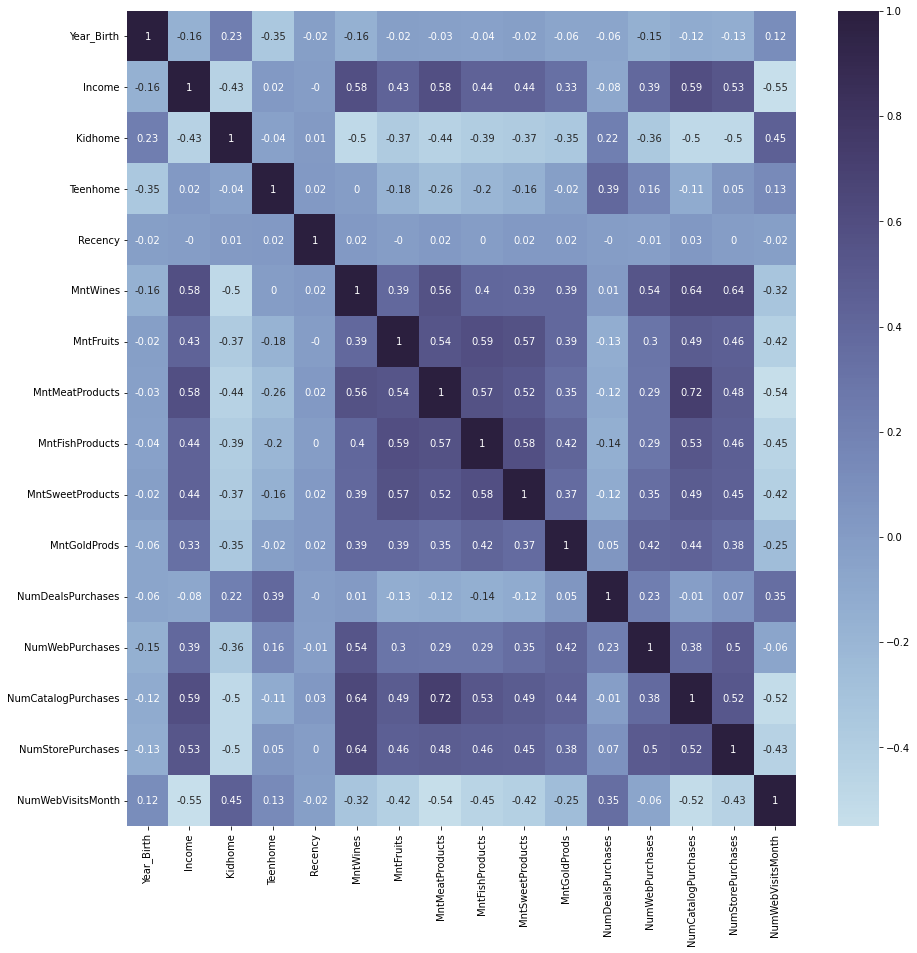

In [9]:
import seaborn as sns

plt.figure(figsize=(15,15))
cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) #defining custom colour map as find it easier to read
sns.heatmap(df_corr_matrix,annot=True,cmap=cmap) #can include annotations onto heatmap to make it easier to read to colours
plt.show()

As you can see there is some moderate correlation between some columns. Considering the number of columns and the presence of this aforementioned correlation, I will be performing dimensionality reduction later. 

From earlier, it was noted that income had some missing values. I shall explore Income further.

In [10]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [11]:
df['Income'].median()

51381.5

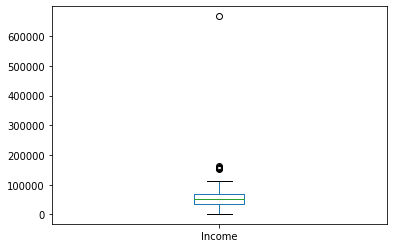

In [12]:
df['Income'].plot.box()
plt.show()

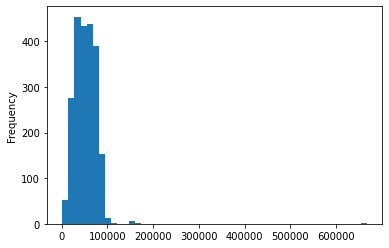

In [13]:
df['Income'].plot.hist(bins=50)
plt.show()

It is likely that the missing income data is simply at random. Therefore, and considering that the missing values account for ~1% of the total, I am going to drop those values.

In [14]:
df.dropna(inplace=True)

From this further analysis, we can see that there are some outliers with Income. We know that K-means does not handle outliers particularly well and thus I shall be removing the outliers here.

In [15]:
df = df[(df['Income']<300000)]

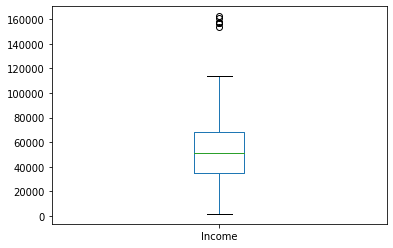

In [16]:
#visually checking income again
df['Income'].plot.box()
plt.show()

Further to just income, let's examine the wider dataset to check for any outliers in other columns.

In [17]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,1968.816704,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,2.322799,4.085779,2.671783,5.802257,5.318736
std,11.987000,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,41.077594,51.822660,1.923820,2.741473,2.927179,3.250974,2.425863
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


Can see that someone has a birth year of 1893 which is clearly not right. Assume this is a typo, but let's explore further:

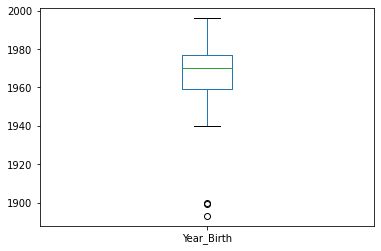

In [18]:
df['Year_Birth'].plot.box()
plt.show()

In [19]:
#quick check on number of people in the outliers
count=0
for i in df['Year_Birth']:
    if i <= 1920:
        count +=1

print(count)

3


In [20]:
#dropping the outliers
df = df[(df['Year_Birth']>=1930)]

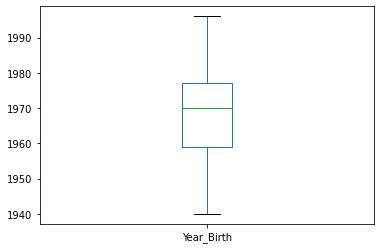

In [21]:
df['Year_Birth'].plot.box()
plt.show()

It was also noted that the Dt_Customer column was not being read as a date. Therefore this needs to be updated by the following:

In [22]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [23]:
# #confirming data type change
# df.info()

I am now going to create some new features out of existing ones to make the data more readable, convert categorical data and reduce the data's dimensions.

1. The first is to get the number of days the person has been a customer.
2. Second, to get the customer's age.
3. Get the number of people in the house.
4. Sum up all the spenditure.

In [24]:
#Number of days customer has been customer
days = []
#As unsure when data taken have to assume it's the most recent date that someone joined
max_date = max(df["Dt_Customer"]) 
for i in df["Dt_Customer"]:
    diff = (max_date - i).days
    days.append(diff)
df["Days"] = days
df["Days"] = pd.to_numeric(df["Days"], errors="coerce")

In [25]:
#max_date 

In [26]:
#df.head(10)

In [27]:
#Calculating person's age. Using the year of the most recent customer to determine people's age.
df['Customer_age']=(max_date.year)-df['Year_Birth']

In [28]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days,Customer_age
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,172,88,88,3,8,10,4,7,971,57
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,1,6,2,1,1,2,5,125,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,472,49
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,10,3,5,2,2,0,4,6,65,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,321,33


Already have the number of kids and teenagers, but need number of adults to determine total number of people in house. We can use the Marital_Status column to determine number of adults.

In [29]:
#first need various options given in marital status column
print(df['Marital_Status'].value_counts())

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [30]:
df['Adults']=data["Marital_Status"].replace({"Married":2, "Together":2, "Absurd":1, "Widow":1, "YOLO":1, "Divorced":1, "Single":1,'Alone':1})

In [31]:
#summing up total people
df['Total_people']=df['Kidhome']+df['Teenhome']+df['Adults']

In [32]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days,Customer_age,Adults,Total_people
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,88,3,8,10,4,7,971,57,1,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,6,2,1,1,2,5,125,60,1,3
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,42,1,8,2,10,4,472,49,2,2
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,5,2,2,0,4,6,65,30,2,3
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,15,5,5,3,6,5,321,33,2,3


In [33]:
#summing up total spend to aid in reducing dimensions
df['Total_spend']=df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Let's produce a new correlation matrix to see how adding the new columns has changed things.

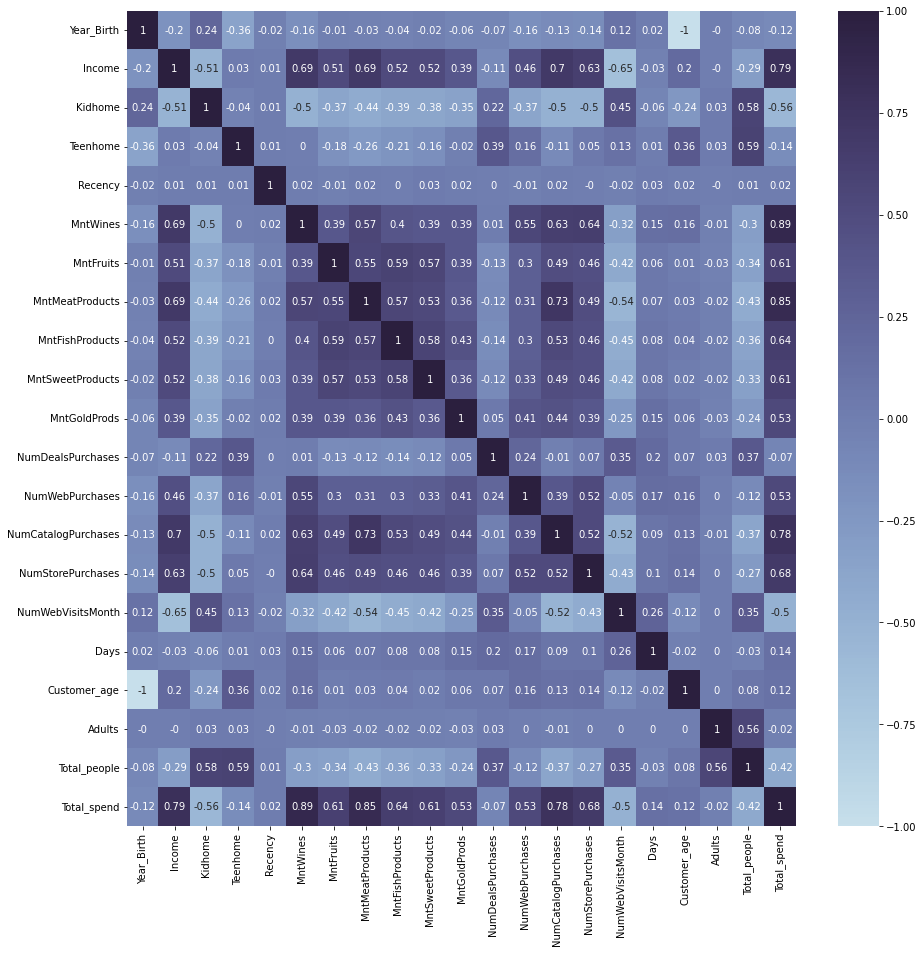

In [34]:
df_corr_matrix=df.corr().round(2)
df_corr_matrix

plt.figure(figsize=(15,15))
cmap=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True) #defining custom colour map as find it easier to read
sns.heatmap(df_corr_matrix,annot=True,cmap=cmap) #can include annotations onto heatmap to make it easier to read to colours
plt.show()

Can be seen that Year_Birth and Customer_age are perfectly negatively correlated, and thus one should be removed. As it is easier to read and handle Customer_age,  I will therefore drop the Year_Birth. Similarly, because I now have the number of days someone as been a customer I'll drop the date they joined.

In [35]:
df.drop(columns=["Year_Birth",'Dt_Customer'],axis=1,inplace=True)

In [36]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days,Customer_age,Adults,Total_people,Total_spend
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,3,8,10,4,7,971,57,1,1,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,1,1,2,5,125,60,1,3,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,1,8,2,10,4,472,49,2,2,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,2,0,4,6,65,30,2,3,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,5,3,6,5,321,33,2,3,422


# Encoding and Scaling Data

Here I shall we transforming categorical data into numerical data using an encoder. The data shall also be scaled.

From earlier, the categorical columns are Education and Marital_Status. I shall use a OneHotEncoder on education as there is notion of progression.

In [37]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()


# edu_col = df[['Education']]
# edu_col_1hot=onehot_encoder.fit_transform(edu_col)

One Marital_Status, i will use an ordinal encoder rather than a label encoder as a label encoder is best used for, as the name suggests, encoding the target variable whereas ordinal is more suited to converting features.

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# ms_col = df[['Marital_Status']]
# ms_col_oe =  ordinal_encoder.fit_transform(ms_col)

In [39]:
#checking for encoding
# ms_col_oe[:10]

ML algorithms work best when the data is scaled. I shall used Scipy's `StandardScaler()` and create a scaled copy of the dataframe.

In [40]:
from sklearn.preprocessing import StandardScaler
#taking copy of df
# df1=df.copy()

standard_scaler=StandardScaler()

# standard_scaler.fit(df1)

# #creating a scaled copy
# df_scaled =  pd.DataFrame(standard_scaler.transform(df1),columns=df1.columns)

In [41]:
from sklearn.compose import ColumnTransformer
#creating a copy
df1=df.copy()
#taking only the numerical columns, i.e. dropping the categorical ones
df1_num=df1.drop(['Education','Marital_Status'],axis=1)

num_attribs=list(df1_num)

full_pipeline=ColumnTransformer([
    ("num",standard_scaler,num_attribs),
    ("cat1", onehot_encoder,['Education']),
    ("cat2",ordinal_encoder,['Marital_Status']),
    ])

consumers_prepared=full_pipeline.fit_transform(df1) #result is an array



# Reducing Dimensionality

It is important to note that reducing the dimensions of a dataset aren't always required. However, whilst it does aid in training times,  some of the features are considerably correlated and thus redundant.

For reducing my dimensions i shall be using Principal Component Analysis (PCA). I shall be reducing it down to 3 dimensions so that it helps plotting visually.

In [42]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(consumers_prepared)
df_pca=pd.DataFrame(pca.transform(consumers_prepared),columns=['x','y','z'])

<function matplotlib.pyplot.show(close=None, block=None)>

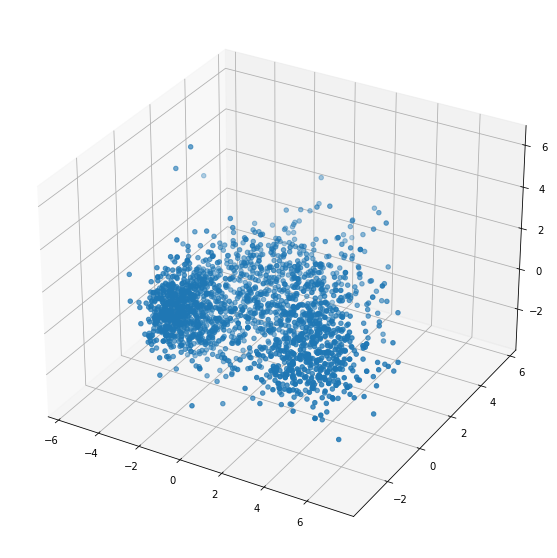

In [43]:
#plotting in 3D
x = df_pca['x']
y=df_pca['y']
z=df_pca['z']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z)
plt.show

# Clustering

The first method I'll be using is the hierarchical method as previously discussed (NB: will have already mentioned it in paper i.e. literature rewiew). Specifically, I'll be using aggolomerative clustering (NB: perhaps write some notes on this method from the "Hands on ML book" - have this though in the methodology section).

First, the optimal number of clusters needs to be found. Too many clusters and they become meaningless, too few and the clusters are too generic. To find the optimal number, i shall employ the "elbow" method. There is a tool available specifically for this task via: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

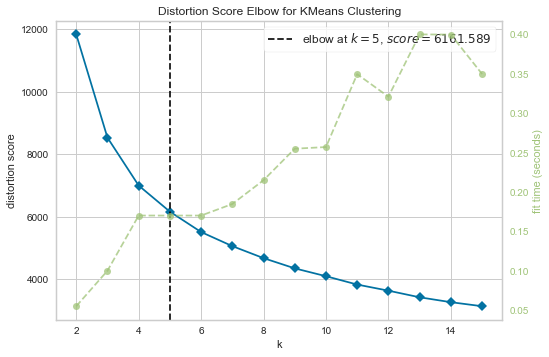

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
"""
Note; had to install KElbowVisualiser via Anaconda Prompt
"""

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow_vis=KElbowVisualizer(KMeans(),k=15)
elbow_vis.fit(df_pca)
elbow_vis.show()

The elbow visualiser suggests that 5 clusters is the optimal number of clusters for the dataset.

## Hierarchical Clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

agglo_clust = AgglomerativeClustering(n_clusters=5)
#fitting and predicting clusters
cluster=agglo_clust.fit_predict(df_pca)

In [46]:
#adding the cluster back to the reduced and original datasets
df_pca['Cluster']=cluster
df['Cluster']=cluster

From earlier we saw a 3D plot of the data. We can now plot the same data but coloured based on the assigned cluster.

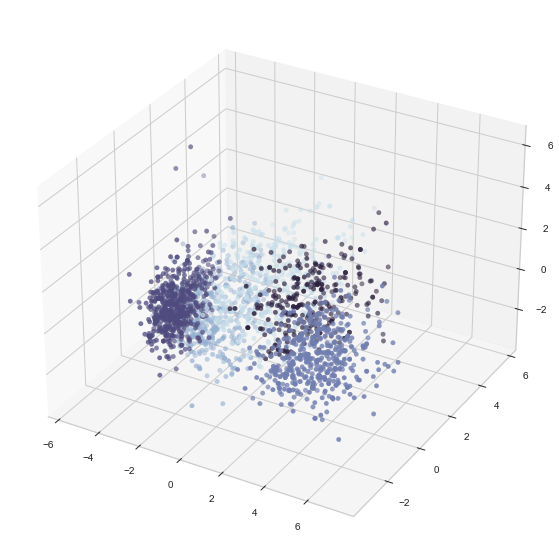

In [68]:
fig=plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, c=df_pca["Cluster"], cmap = cmap )
plt.savefig("3D_hierarchical")
plt.show()

In [48]:
print(df['Cluster'].value_counts())

3    599
2    475
1    454
0    398
4    286
Name: Cluster, dtype: int64


The first four clusters look of similar size, however the fifth seems small in comparison but this isn't necessarily a bad thing - they just may be a smaller group of similar individuals.

First thing is to plot income versus spend:

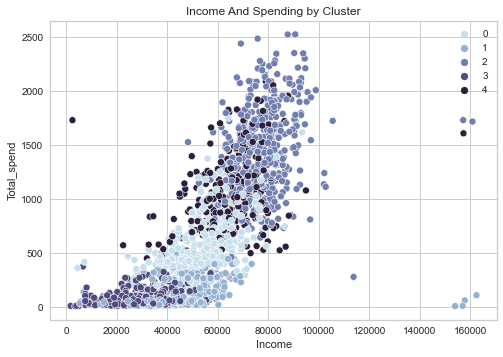

In [69]:
income_spend_plt = sns.scatterplot(data = df, y=df['Total_spend'],x=df['Income'],hue=df['Cluster'],palette=cmap)
income_spend_plt.set_title("Income And Spending by Cluster")
plt.legend()
plt.savefig("Hier_income_vs_spend")
plt.show()



The spread of each cluster's spend can be examined using a box plot shown below.

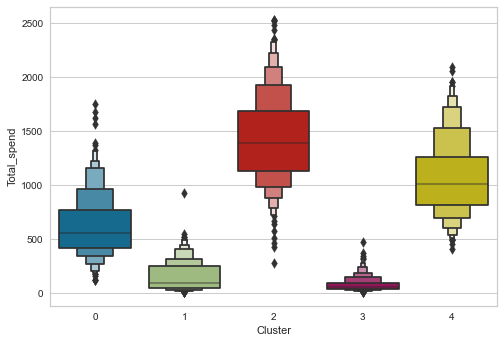

In [70]:
plt.figure()
pl=sns.boxenplot(x=df["Cluster"], y=df["Total_spend"])
plt.savefig("Hier_total_spend_boxplot")
plt.show()

Let's analyse the age of the people in the clusters:

<function matplotlib.pyplot.show(close=None, block=None)>

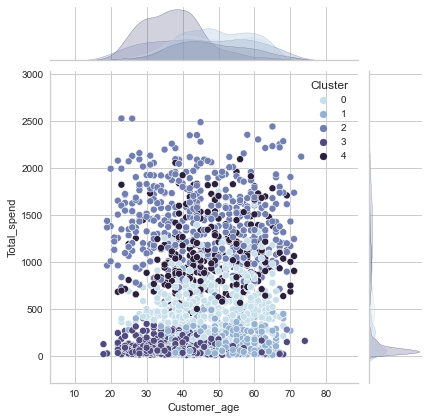

In [71]:
sns.jointplot(data=df, x=df['Customer_age'],y=df['Total_spend'],hue=df['Cluster'],palette=cmap)
plt.savefig("Hier_age_vs_spend_scatter")
plt.show

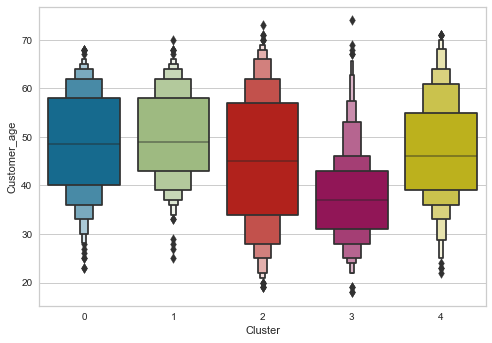

In [72]:
plt.figure()
pl=sns.boxenplot(x=df["Cluster"], y=df["Customer_age"])
plt.savefig("Hier_age_boxplot")
plt.show()

0. Cluster 0: Ages 40-60
1. Cluster 1: Ages 30-45
2. Cluster 2: Ages 30-60
3. Cluster 3: Ages 35-60
4. Cluster 4: Ages 37-58

<function matplotlib.pyplot.show(close=None, block=None)>

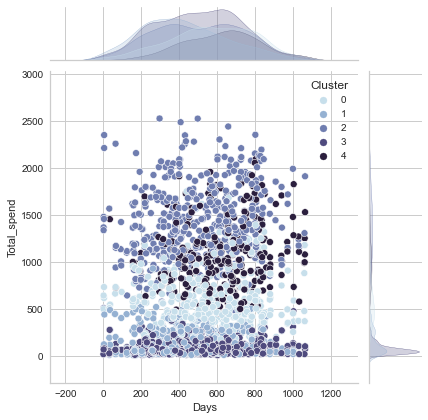

In [53]:
sns.jointplot(data=df, x=df['Days'],y=df['Total_spend'],hue=df['Cluster'],palette=cmap)
plt.show

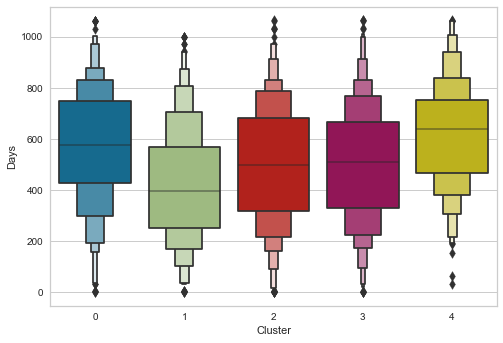

In [73]:
plt.figure()
pl=sns.boxenplot(x=df["Cluster"], y=df["Days"])
plt.savefig("Hier_customer_days_boxplot")
plt.show()

Clusters 0-2 are made up of people who have been a customer for around the same amount of days. Those in cluster 3 have been a customer on average longer. Cluster 4 contains those who have been customers the longest.

<function matplotlib.pyplot.show(close=None, block=None)>

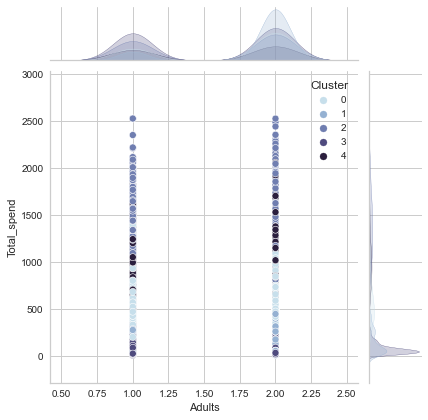

In [55]:
sns.jointplot(data=df, x=df['Adults'],y=df['Total_spend'],hue=df['Cluster'],palette=cmap)
plt.show

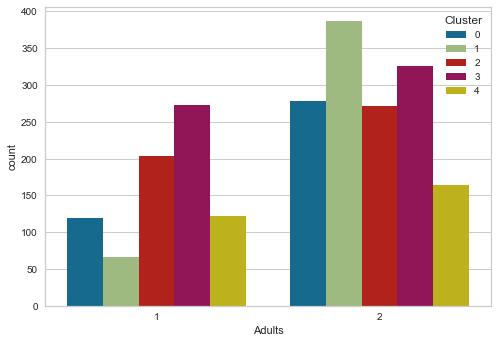

In [75]:
plt.figure()
pl = sns.countplot(x=df["Adults"],hue=df["Cluster"])
plt.savefig("Hier_adults")
plt.show()

Cluster 0: Predominantly 2 adults

All other clusters have no predominance of adults.

<function matplotlib.pyplot.show(close=None, block=None)>

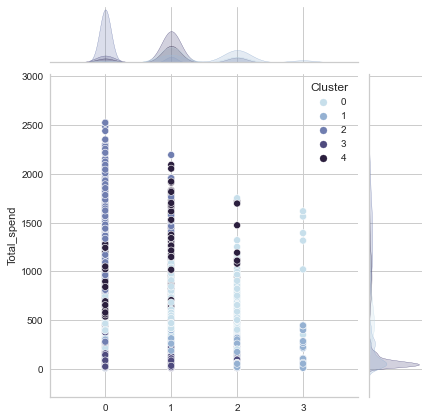

In [57]:
sns.jointplot(data=df, x=(df['Kidhome']+df['Teenhome']),y=df['Total_spend'],hue=df['Cluster'],palette=cmap)
plt.show

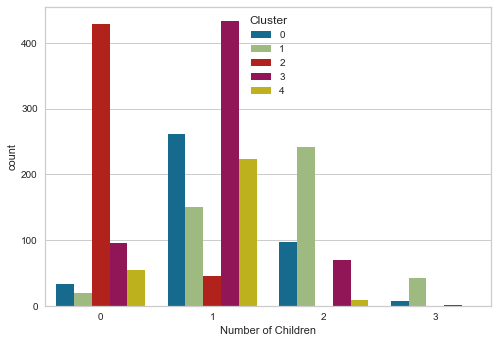

In [76]:
plt.figure()
pl = sns.countplot(x=(df['Kidhome']+df['Teenhome']),hue=df["Cluster"])
plt.xlabel("Number of Children")
plt.savefig("Hier_children")
plt.show()

0. Cluster 0: Mostly 1 or 2 children
1. Cluster 1: Mostly 1 child
2. Cluster 2: Mostly no children
3. Cluster 3: Mostly 1 child, sometimes 0
4. Cluster 4: Mostly 1 or 2 children

<function matplotlib.pyplot.show(close=None, block=None)>

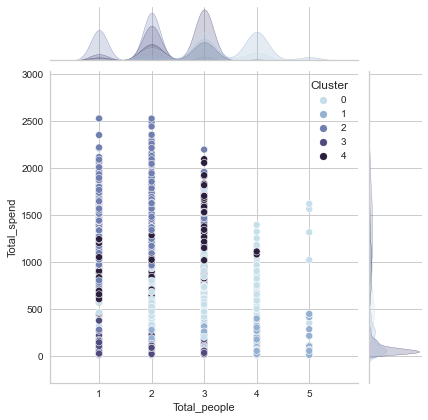

In [59]:
sns.jointplot(data=df, x=df['Total_people'],y=df['Total_spend'],hue=df['Cluster'],palette=cmap)
plt.show

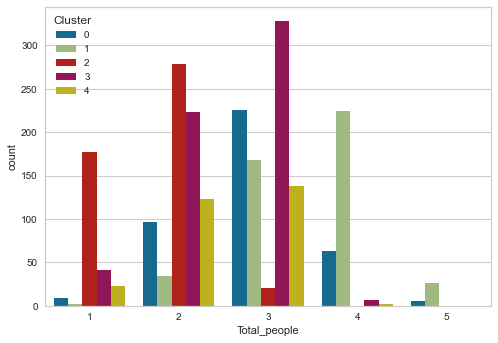

In [60]:
plt.figure()
pl = sns.countplot(x=df['Total_people'],hue=df["Cluster"])
plt.show()

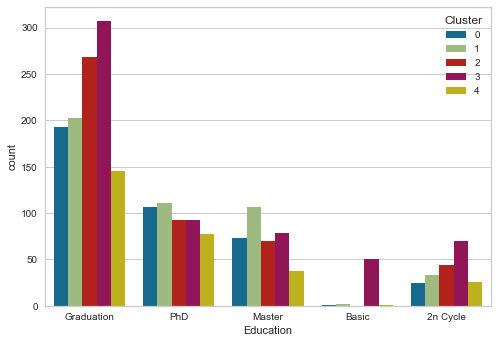

In [61]:
plt.figure()
pl = sns.countplot(x=df['Education'],hue=df["Cluster"])
plt.show()

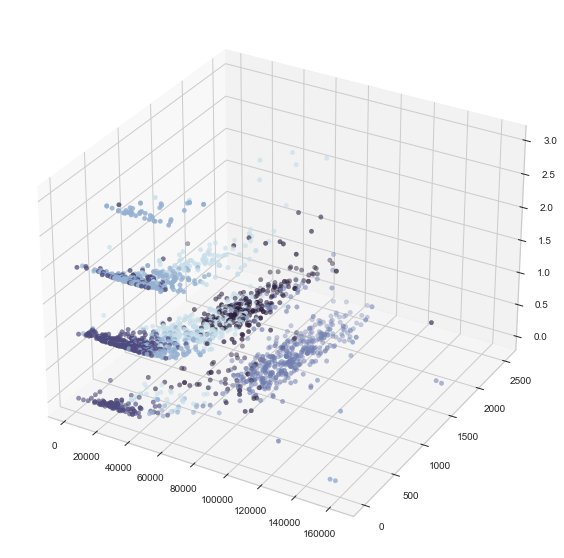

In [62]:
fig=plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df['Income'], df['Total_spend'], (df['Kidhome']+df['Teenhome']), c=df["Cluster"], cmap = cmap )
plt.show()

## K-Means Clustering

Please the k-means clustering code sheet.